# Importing the libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB5
%matplotlib inline

In [2]:
#Assigning paths to train and test set
IMAGE_SIZE = [512,512]
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
dataset = r"C:\Users\AKASH\OneDrive\Desktop\BrainSightAI\archive (7)"
train_dir = r"C:\Users\AKASH\OneDrive\Desktop\BrainSightAI\archive (7)\Training"
test_dir =  r"C:\Users\AKASH\OneDrive\Desktop\BrainSightAI\archive (7)\Testing"


# Abstract

A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.
Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.

# Creating my Training set

In [3]:
X_train = []
y_train = []
image_size = 512
for i in labels:
    folderPath = os.path.join(train_dir,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(test_dir,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)


100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 130.89it/s]


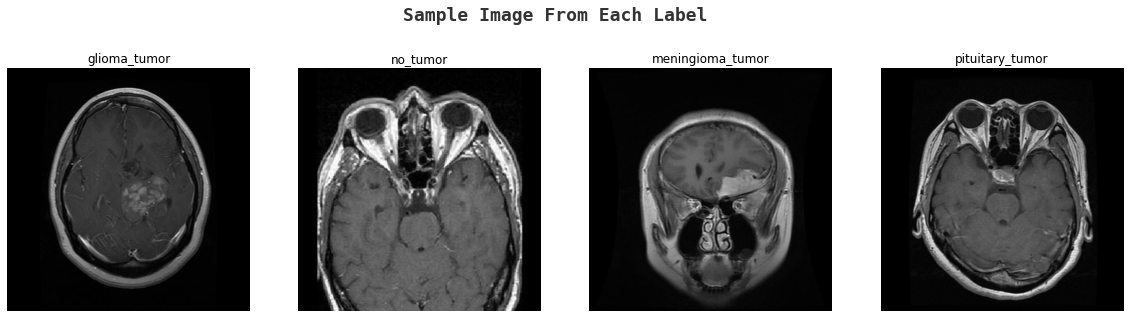

In [4]:
#Visualising the images
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [5]:
#Random shuffling to add more randomization
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [6]:
X_train.shape

(3264, 512, 512, 3)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2)

C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

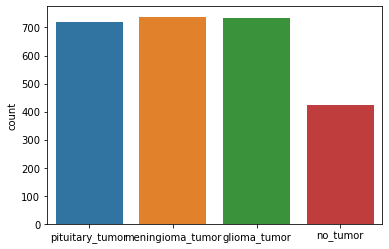

In [8]:
sns.countplot(y_train,orient = "v")

The dataset for no tumor is low we can later do data augmentation for this

C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

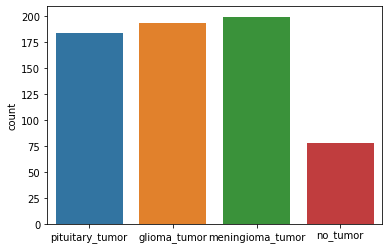

In [9]:
sns.countplot(y_test)

In [10]:
#Encoding the data
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
y_test_new

[3,
 0,
 3,
 2,
 0,
 2,
 2,
 2,
 3,
 2,
 0,
 1,
 0,
 1,
 3,
 3,
 0,
 3,
 1,
 3,
 3,
 1,
 3,
 2,
 3,
 0,
 3,
 0,
 1,
 2,
 0,
 1,
 3,
 1,
 0,
 2,
 1,
 3,
 0,
 3,
 3,
 0,
 0,
 3,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 3,
 3,
 2,
 2,
 0,
 2,
 0,
 3,
 3,
 3,
 3,
 1,
 1,
 0,
 2,
 0,
 3,
 0,
 1,
 3,
 0,
 0,
 2,
 3,
 0,
 2,
 2,
 3,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 3,
 1,
 2,
 0,
 3,
 0,
 0,
 2,
 1,
 2,
 3,
 2,
 3,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 3,
 3,
 2,
 3,
 3,
 3,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 3,
 2,
 2,
 0,
 0,
 2,
 3,
 2,
 0,
 0,
 0,
 0,
 3,
 2,
 0,
 1,
 2,
 0,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 2,
 2,
 0,
 3,
 2,
 2,
 2,
 0,
 0,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 0,
 3,
 0,
 0,
 3,
 1,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 0,
 1,
 2,
 2,
 0,
 2,
 3,
 3,
 2,
 0,
 2,
 3,
 1,
 3,
 1,
 3,
 0,
 3,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 2,
 3,
 0,
 3,
 3,
 3,
 1,
 3,
 2,
 0,
 2,
 1,
 0,
 3,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 2,


In [12]:
# Transfer Learning with EfficientNet B6
#effnet = EfficientNetB5(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

In [13]:
effnet = EfficientNetB5(weights='imagenet',
                        include_top=False,
                        input_shape=(image_size,image_size,3))


In [14]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.4)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [15]:
effnet.output

<KerasTensor: shape=(None, 16, 16, 2048) dtype=float32 (created by layer 'top_activation')>

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 512, 512, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 512, 512, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 513, 513, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [17]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [18]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =1, verbose=1, batch_size=8,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

C:\Users\AKASH\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


215/294 [====================>.........] - ETA: 1:17:55 - loss: 0.6797 - accuracy: 0.7709

Due to my resouces constraint I am unable to train my model any further. But I am pretty sure that on increasing the number of epochs we will get a very good accuracy

Also we could go ahead data augmentation to increase my dataset size which might help in improving the accuracy.

In [ ]:
X_check = []
y_check = []
image_size = 512
for i in labels:
    folderPath = os.path.join(test_dir,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_check.append(img)
        y_check.append(i)
        
for i in labels:
    folderPath = os.path.join(test_dir,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_check.append(img)
        y_check.append(i)
        
X_check = np.array(X_check)
y_train = np.array(y_check)

In [ ]:
pred = model.predict(X_test)
pred = [np.argmax(i) for i in pred]
_y_test = [np.argmax(i) for i in y_test]
confusion_matrix(_y_test, pred)